<a href="https://colab.research.google.com/github/sota-ogawa/TU-math-study/blob/main/chap08_Ex_Cm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第3位まで表示
%precision 3

'%.3f'

In [ ]:
#Ex_01
# 自動車価格データの取得
import requests, zipfile
import io

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content
auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)
auto.columns =['symboling','normalized-losses','make','fuel-type' ,'aspiration','num-of-doors',
                            'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
                            'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
                            'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

# 解答
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# データの前処理
auto = auto[['price','width','engine-size']]
auto = auto.replace('?', np.nan).dropna()
auto.shape

# 学習用/検証用にデータを分割
X = auto.drop('price', axis=1)
y = auto['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# モデルの構築・評価
model = LinearRegression()
model.fit(X_train,y_train)
print('決定係数(train):{:.3f}'.format(model.score(X_train,y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test,y_test)))

決定係数(train):0.783
決定係数(test):0.778


In [ ]:
#Ex_02
# 解答
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

model = LogisticRegression()
model.fit(X_train,y_train)
print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.958
正解率(test):0.923


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#Ex_03
# 解答
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = LogisticRegression()
model.fit(X_train_std,y_train)
print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.991
正解率(test):0.958


In [ ]:
#Ex_04
# 解答
from sklearn.linear_model import LinearRegression, Lasso

X = auto.drop('price', axis=1)
y = auto['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

models = {
    'linear': LinearRegression(),
    'lasso1':  Lasso(alpha=1.0, random_state=0),
    'lasso2':  Lasso(alpha=200.0, random_state=0)
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train,y_train)
    scores[(model_name, 'train')] = model.score(X_train, y_train)
    scores[(model_name, 'test')] = model.score(X_test, y_test)

pd.Series(scores).unstack()

,test,train
lasso1,0.778308,0.783189
lasso2,0.782421,0.782839
linear,0.778292,0.783189


In [ ]:
#Ex_05
# 解答
from sklearn.tree import  DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=66)

models = {
    'tree1': DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=0),
    'tree2': DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0),
    'tree3': DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0),
    'tree4': DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0),
    'tree5': DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0),
    'tree6': DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train,y_train)
    scores[(model_name, 'train')] = model.score(X_train, y_train)
    scores[(model_name, 'test')] = model.score(X_test, y_test)

pd.Series(scores).unstack()

,test,train
tree1,0.930070,0.971831
tree2,0.902098,0.997653
tree3,0.902098,1.000000
tree4,0.923077,0.974178
tree5,0.895105,1.000000
tree6,0.895105,1.000000


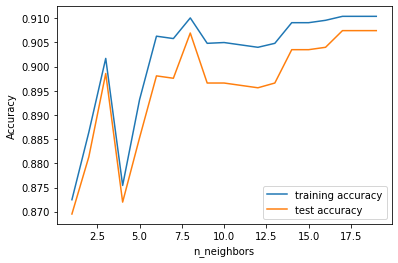

In [ ]:
#Ex_06
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

mush = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)
mush.columns =[
    'classes','cap_shape','cap_surface','cap_color','odor','bruises',
    'gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape',
    'stalk_root','stalk_surface_above_ring','stalk_surface_below_ring',
    'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color',
    'ring_number','ring_type','spore_print_color','population','habitat'
]

mush_dummy = pd.get_dummies(mush[['gill_color','gill_attachment','odor','cap_color']])
mush_dummy['flg'] = mush['classes'].map(lambda x: 1 if x =='p' else 0)
# 解答
from sklearn.neighbors import  KNeighborsClassifier

# 説明変数と目的変数
X = mush_dummy.drop('flg', axis=1)
y = mush_dummy['flg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

training_accuracy = []
test_accuracy =[]
neighbors_settings = range(1,20)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

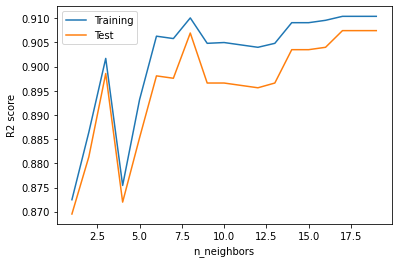

In [ ]:
#Ex_07
import requests, zipfile
from io import StringIO
import io

#必要なデータの読み込み
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r = requests.get(url, stream=True)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()
student = pd.read_csv('student-mat.csv', sep=';')
X = student.loc[:, 
    ['age','Medu','Fedu','traveltime','studytime',
     'failures','famrel','freetime','goout','Dalc','Walc',
     'absences','G1','G2']].values

# 解答
from sklearn.neighbors import  KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(
    X, student.G3, random_state=0)

scores_train = []
scores_test =[]
neighbors_settings = range(1, 20)
for n_neighbors in neighbors_settings:
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    scores_train.append(model.score(X_train, y_train))
    scores_test.append(model.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy,label='Training')
plt.plot(neighbors_settings, test_accuracy,label='Test')
plt.ylabel('R2 score')
plt.xlabel('n_neighbors')
plt.legend()

In [1]:
#Ex_08
# 解答
from sklearn.svm import SVC

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=50)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = SVC(kernel='rbf', random_state=0, C=2)
model.fit(X_train_std,y_train)
print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

NameError: ignored

-回帰-
主な目的は、連続値などの値を使って、ある数値から別の数値を予測です。
例として、過去の気温から明日の気温を予測することや企業の売り上げの予測など

-分類-
主な目的は、分析したいデータが属するクラスを予測すること。
例として、画像に写っているのが犬か猫か判定する

-教師あり学習-
学習データに正解を与えた状態で学習させる手法
回帰と分類はこの教師あり学習に属しており代表的な例である
この手法を用いる目的はデータを実用的な価値にすることであり、例えば電子メールのスパム判定、工業機械の故障予測などが挙げられる。

-重回帰分析-
2つ以上の説明変数から目的変数を導くこと

-ロジスティック回帰分析-
複数の説明変数から2値(答えが2つしかない値(例Yes or No))が起こる確率を予測する手法。ただ、データの一部が欠損している不完全なデータを使用することはできない。
例　説明変数となる勉強時間、部活動、スマホの利用時間、睡眠時間をもとに2値の目的変数となる受験の合否の確率を予測する

-正則化-
過学習対策の手法であり、学習データへの過剰フィッチングに伴うモデル複雑化を抑制しながら、より単純なモデルとして学習データを表現できることを目指したもの。

-リッジ回帰-
正則化された線形回帰の1つで、線形回帰に「学習した重みの2乗(L2正則化項)」を加えたもの、L2正則化項による正則化では重みは完全に0にはならない性質があるため、説明変数が非常に多い時にはモデルの解釈が複雑になるという欠点がある。
L=(y-X_w )^T (y-X_w )+α‖w‖^2
一項目が損失関数、二項目が正則化項

-ラッソ回帰-
リッジ回帰と同じく正則化された線形回帰の1つ。
最小二乗コスト関数に対して、重みの合計を足したもの(L1正則化項).
L=(y-X_w )^T (y-X_w )+α‖w‖
一項目が損失関数、二項目が正則化項


-決定木-
ある目的に到達するためにデータの各属性の条件分岐を繰り返してクラス分けする方法
-エントロピー-
多数の変数の中でどの変数から最も有益な条件分岐を得られるか見分けてくるアルゴリズムを決定木といい、その分岐条件の優劣を決める際に不純度が使われる。その不純度の指標として使われているのがエントロピーである。

-情報利得-
ある変数を使ってデータ分割するとき、そのデータ分割の前後でどれだけエントロピーが減少したかを表す指標。

-k-NN法-
分類に使われる手法の一つで、与えられた学習データをベクトル空間上にプロットしておき、未知のデータが得られたら、そこから距離が近い順に任意のk個を取得し、その多数決でデータが属するクラスを推定するというもの。

-SVM-
カテゴリを識別する境界線を1本の線ではなく、マージンが最大になるように引く手法

-ノーフリーランチ-
全ての問題において優れた性能を発揮できる“万能”の「教師ありの機械学習モデル」や「探索／最適化のアルゴリズム」など（＝無料のランチ）は理論上、存在しないことを指す。
